A notebook for exploring the real market data:

TODOs:
- Calculate L(t) on S&P data over various 60 day horizons
- Compare to figures from paper

In [8]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import utility
from utility import calc_normalized_return, return_from_price,calc_L


In [2]:
arr = np.loadtxt("data/Index_Data.csv",
                 delimiter=",", dtype=str)
# get the returns in a float array
closing_price = arr[7:,1].astype(np.float)
returns = return_from_price(closing_price)
norm_returns = calc_normalized_return(returns)

In [6]:
norm_returns

array([ 1.05307546e-01,  4.50129981e-01,  6.02198579e-02, -6.88314886e-02,
       -4.09127408e-01, -9.67644459e-02, -1.14325153e+00,  1.90748266e+00,
       -6.07278101e-01, -4.45109779e-01,  1.14600525e-01, -2.16745838e-01,
       -1.54644732e+00, -4.53718005e-01, -3.71862995e-01, -3.92600409e-01,
       -8.61570191e-01,  5.82103772e-01,  1.74640249e-01,  7.65984930e-01,
       -6.08165774e-01, -3.54824488e-01,  2.20637317e-01, -1.40379883e-02,
        3.43614614e-01,  3.26077824e-02, -3.88432999e-01,  3.51758200e-01,
       -7.91706401e-01, -5.07838816e-02, -3.96205414e-02, -8.91017590e-02,
       -2.19661069e+00,  2.07164361e-01, -1.78245994e+00,  1.09413228e+00,
       -1.70575610e-02, -2.40202310e-01, -1.08060007e-01, -1.03374053e+00,
       -2.17074403e+00, -1.16790777e+00, -6.80962012e-01, -1.34910595e+00,
        6.91513929e-01,  1.55539953e+00,  1.86487482e+00, -7.76643652e-01,
        3.10822014e-01,  1.64824413e+00,  1.14313609e+00,  1.74877414e+00,
        1.17285545e-01, -

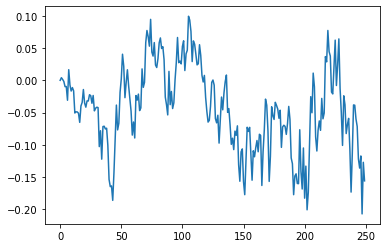

In [10]:
R_primes=[]
for t in range(1,len(norm_returns)):
    R_primes.append(utility.calc_weighted_return_noGamma(returns,150,t))

plt.plot(R_primes)

Text(0.5, 0, 't (day)')

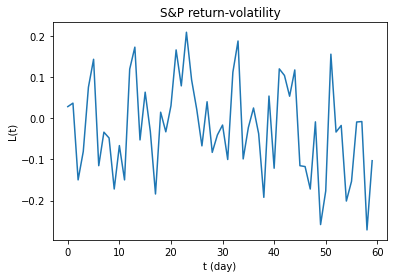

In [8]:
t_end = 60
ret_vol_cor=np.zeros(t_end)
for i in range(t_end):
    ret_vol_cor[i] = calc_L(norm_returns,i)
plt.plot(ret_vol_cor)
plt.title("S&P return-volatility")
plt.ylabel("L(t)")
plt.xlabel("t (day)")


Does not qualitatively match figures from paper. Check for bugs. Other possibility is we mis-interpreted L(t) or we need specfic data. 